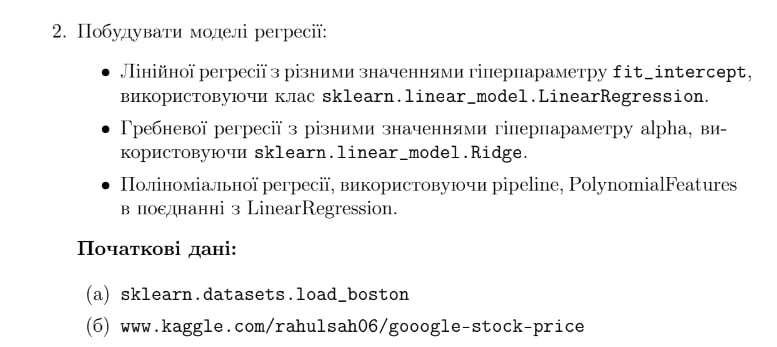

In [213]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

dataset = sklearn.datasets.load_boston()

In [214]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [215]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best alpha: {regression.best_params_}')

In [216]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

In [218]:
print(sklearn.datasets.load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [219]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV'] = pd.Series(dataset.target)

In [220]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [221]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [222]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

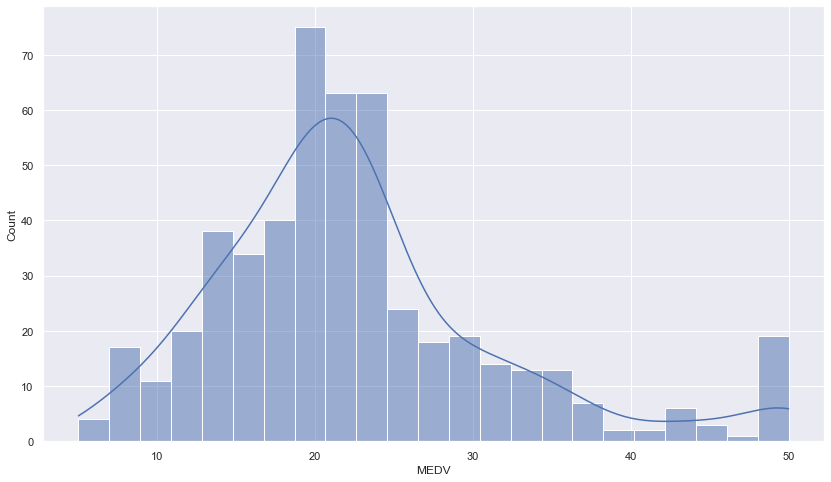

In [223]:
sns.histplot(data=df['MEDV'], kde=True)

Бачимо, що медіана розподілена нормально з деякими вибросами, скоріше всього через те, що ціни які були більше за 50к долларів записувалися у 50.

<AxesSubplot:>

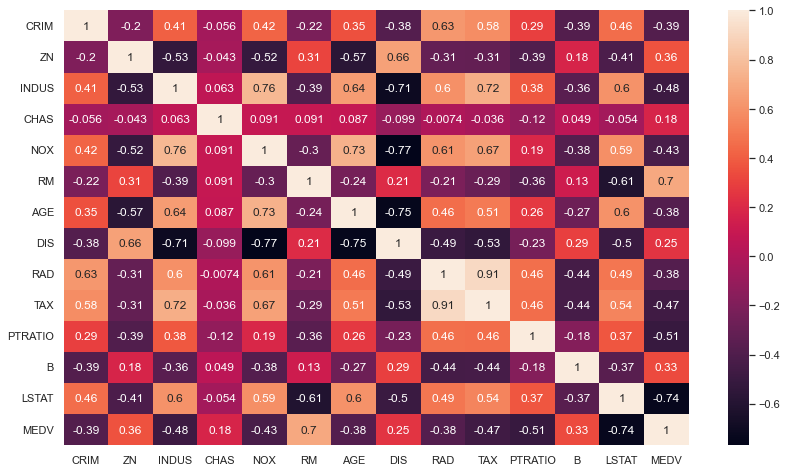

In [224]:
corr = df.corr()
sns.heatmap(data=corr, annot=True)

З корреляції ми виберемо саме ті ознаки які допоможуть найкраще побудувати нашу модель (хоч і не завжди сильна кореляція означає велике значення для коефіцієнтів):
1. Найкращими на перший погляд є: RM (сильна кореляція (.7)), LSTAT (сильна негативна кореляція(-.74))
2. Важливою частиною є пошук мультиколлінеарностей (коли дві, або більше, ознаки мають між собою сильну кореляцію, то це негативно впливає на результат пошуку коефіцієнтів), такими є RAD та TAX, ми не повинні ці обидві ознаки залишати у нашому навчальному датасеті

Для початку візьмемо: TAX, RM, LSTAT

In [225]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['TAX']], columns=['LSTAT', 'RM', 'TAX'])
y = df['MEDV']

<font size="5">Почнемо з Linear regression з різними параметрами fit_intecept:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [227]:
linreg = LinearRegression()
parameters = {'fit_intercept': [True, False]}

linreg_gridsearch = GridSearchCV(linreg, parameters, scoring='neg_mean_squared_error', cv=5)

In [228]:
linreg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [229]:
gridsearchscore(linreg_gridsearch)

Best score: -31.067968982352063, Best alpha: {'fit_intercept': False}


In [230]:
linreg_gridsearch.cv_results_

{'mean_fit_time': array([0.00279984, 0.00159988]),
 'std_fit_time': array([0.0007488 , 0.00048996]),
 'mean_score_time': array([0.00079989, 0.00079989]),
 'std_score_time': array([0.00039995, 0.00039995]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_score': array([-34.26668928, -33.83543451]),
 'split1_test_score': array([-46.40717269, -45.25795656]),
 'split2_test_score': array([-26.91686095, -25.57354526]),
 'split3_test_score': array([-27.16616375, -24.63518806]),
 'split4_test_score': array([-26.45648715, -26.03772052]),
 'mean_test_score': array([-32.24267477, -31.06796898]),
 'std_test_score': array([7.64650064, 7.82160309]),
 'rank_test_score': array([2, 1])}

In [231]:
predict_lin = linreg_gridsearch.predict(X_test)

regression_score(y_test, predict_lin)

RMSE: 5.247435692593153
MSE: 27.53558134790058
R2: 0.5824940299898187
MAPE: 3.752852519084471


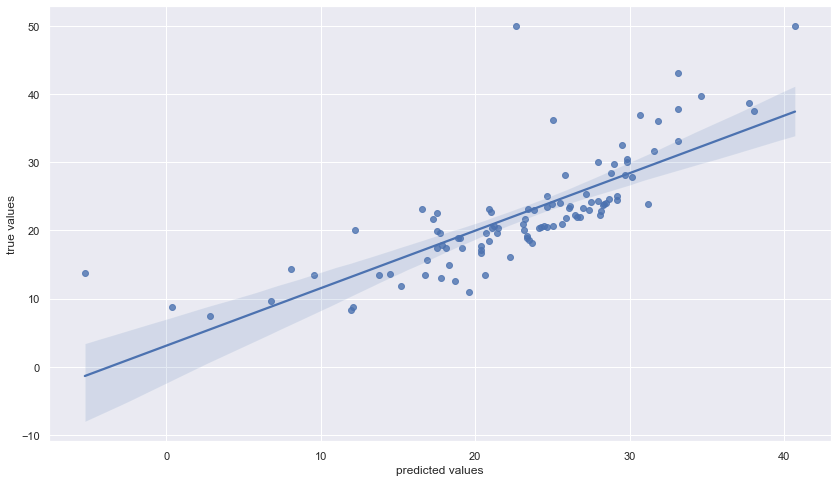

In [232]:
truepredplot(y_test, predict_lin)

In [233]:
predict_lin = linreg_gridsearch.predict(X_train)

regression_score(y_train, predict_lin)

RMSE: 5.508036786396866
MSE: 30.33846924030111
R2: 0.6594310284407784
MAPE: 3.89943545834421


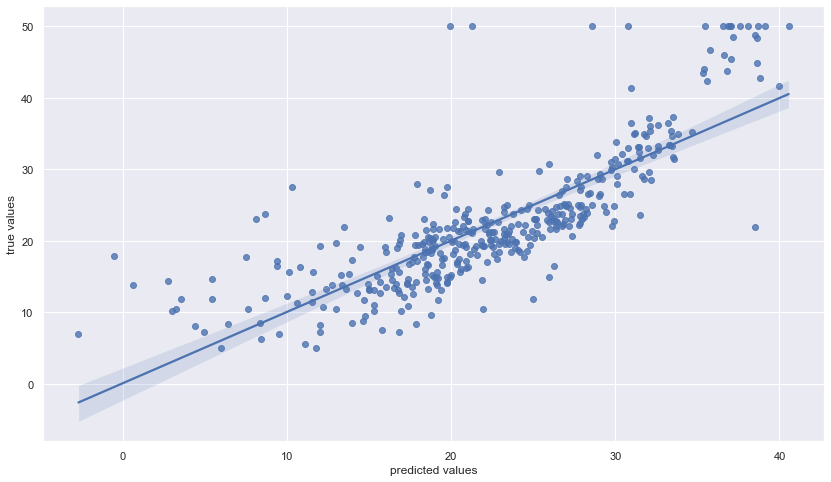

In [234]:
truepredplot(y_train, predict_lin)

Решітчастий пошук дав результат, що найкраще значення для fit_intercept=False, ознак сильного перенавчання немає, хоча і R^2 на навчальній виборці дорівнює 0.65

<font size="5">Тепер спробуємо Rigde regression з різними параметрами alpha:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [235]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
parameters = {'alpha': [0, 0.1, 1, 2, 5]}

rigde_reg_gridsearch = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [236]:
rigde_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0, 0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [237]:
gridsearchscore(rigde_reg_gridsearch)

Best score: -32.17693475364133, Best alpha: {'alpha': 5}


In [238]:
rigde_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.0022007 , 0.00200043, 0.00180073, 0.00180063, 0.00140066]),
 'std_fit_time': array([0.00074862, 0.00063196, 0.0004004 , 0.00074848, 0.00080051]),
 'mean_score_time': array([0.00140052, 0.00100012, 0.00099998, 0.00059996, 0.00100007]),
 'std_score_time': array([4.90038506e-04, 1.02713867e-06, 6.32183763e-04, 4.89862928e-04,
        3.56832255e-07]),
 'param_alpha': masked_array(data=[0, 0.1, 1, 2, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 2},
  {'alpha': 5}],
 'split0_test_score': array([-34.26668928, -34.27104213, -34.31021756, -34.35373301,
        -34.48402124]),
 'split1_test_score': array([-46.40717269, -46.39229113, -46.26061943, -46.11896384,
        -45.7214537 ]),
 'split2_test_score': array([-26.91686095, -26.90133064, -26.76420484, -26.61726755,
        -26.20834914]),
 'split3_test_score': array([-27.16616375

In [239]:
predict_ridge = rigde_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_ridge)

RMSE: 5.271326620015607
MSE: 27.786884334885162
R2: 0.5786836692779156
MAPE: 3.804218869334335


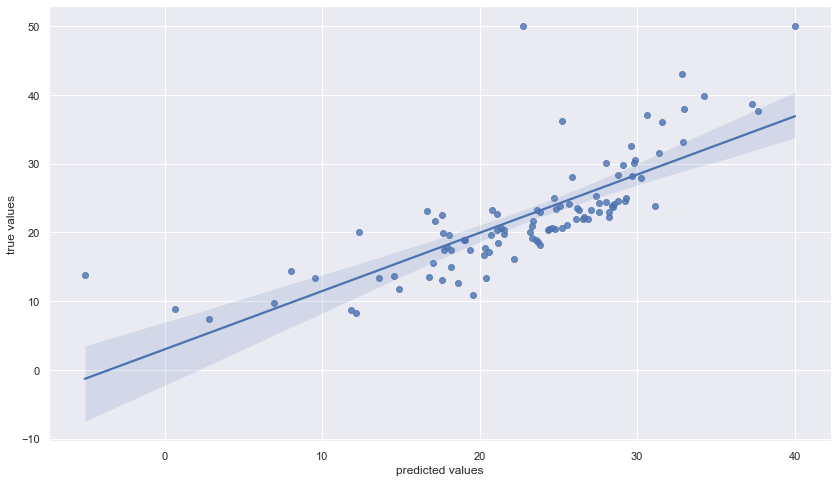

In [240]:
truepredplot(y_test, predict_ridge)

In [241]:
predict_ridge = rigde_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_ridge)

RMSE: 5.507937766880305
MSE: 30.3373784438264
R2: 0.6594432733378637
MAPE: 3.918287751730286


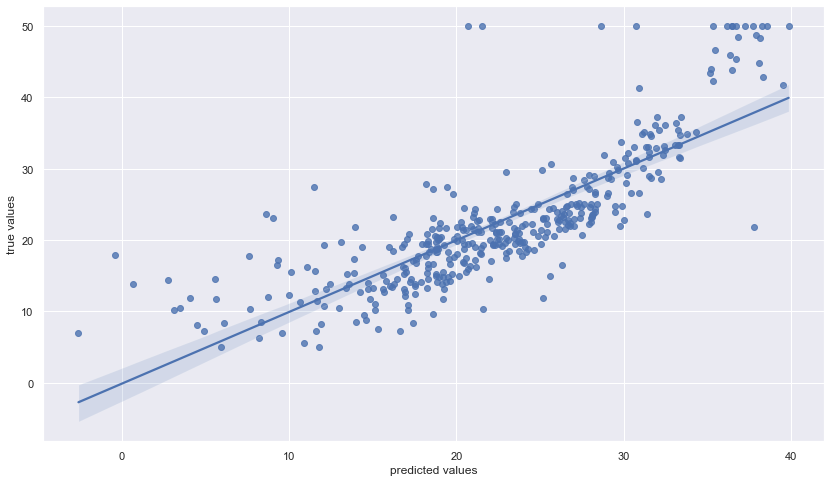

In [242]:
truepredplot(y_train, predict_ridge)

Гребнева регресія показує себе гірше ніж лінійна, найкращий параметр alpha = 5, цікаво, що з параметром alpha = 0, це повинна бути таж сама лінійна регресія, але через реалізацію у sklearn вона не дає такий же самий результат.
<br>
Але загалом різниця не дуже велика

<font size="5">Тепер спробуємо Polynomial regression використовуючи pipeline, PolynomialFeatures в поєднанні з LinearRegression:</font> <br>

In [247]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

Яке число для degree краще підійде перевіримо вручну <br>
include_bias=False, тому що ми будемо використовувати це разом із LinearRegression, а вона подбає про це налаштування сама

In [248]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

In [249]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 4.148929620742488
MSE: 17.213616997874407
R2: 0.7389999589520471
MAPE: 2.781480488382


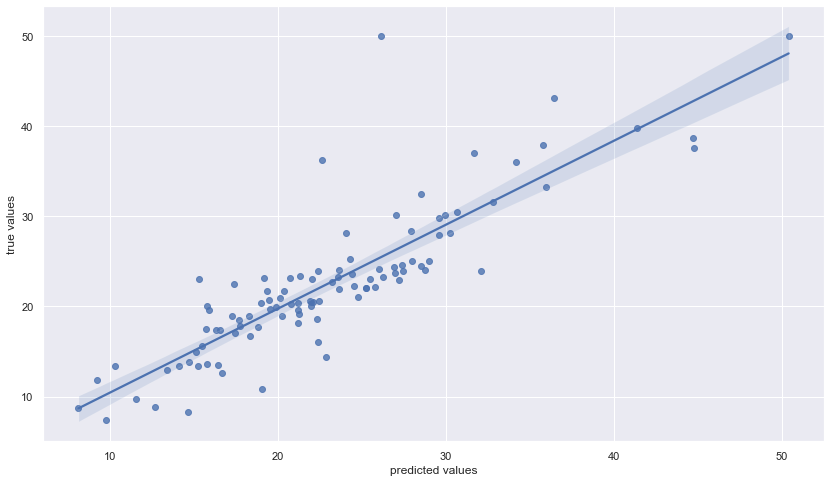

In [250]:
truepredplot(y_test, predict_poly)

In [251]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 3.8014649966719665
MSE: 14.451136120922193
R2: 0.8377766350839149
MAPE: 2.7399048024032746


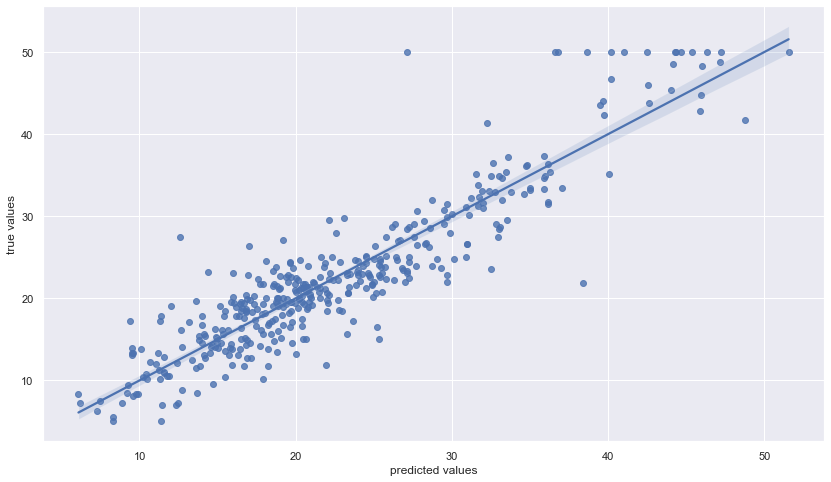

In [252]:
truepredplot(y_train, predict_poly)

Тепер для degree=3

In [253]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

In [254]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('regressor', LinearRegression())])

In [255]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 3.847224990915737
MSE: 14.801140130726596
R2: 0.7755789395016066
MAPE: 2.542787133004419


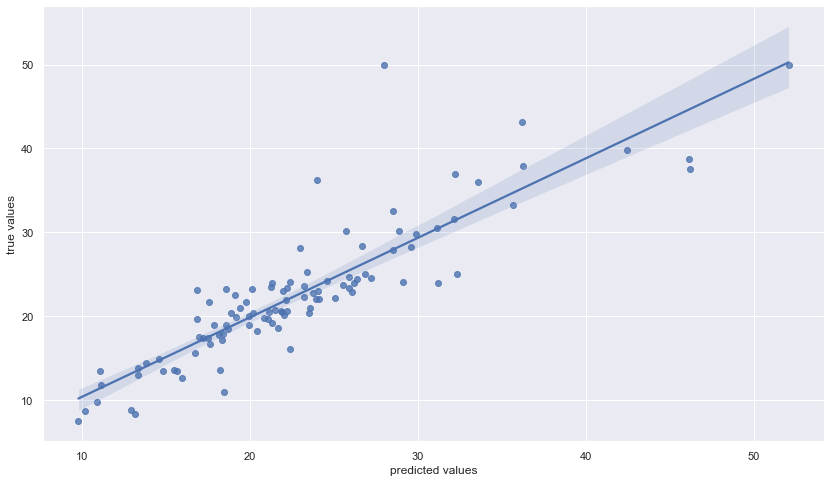

In [256]:
truepredplot(y_test, predict_poly)

In [257]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 3.3338957460924235
MSE: 11.114860845813157
R2: 0.8752284864045146
MAPE: 2.4769959508672446


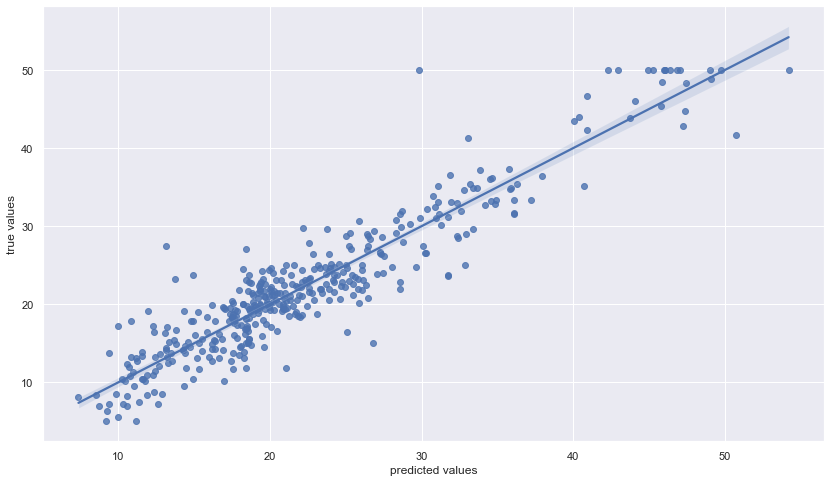

In [258]:
truepredplot(y_train, predict_poly)

Degree = 4

In [260]:
poly = PolynomialFeatures(degree=4, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

In [261]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('regressor', LinearRegression())])

In [262]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 3.8786026774647984
MSE: 15.043558729637102
R2: 0.7719032875875294
MAPE: 2.487755494575136


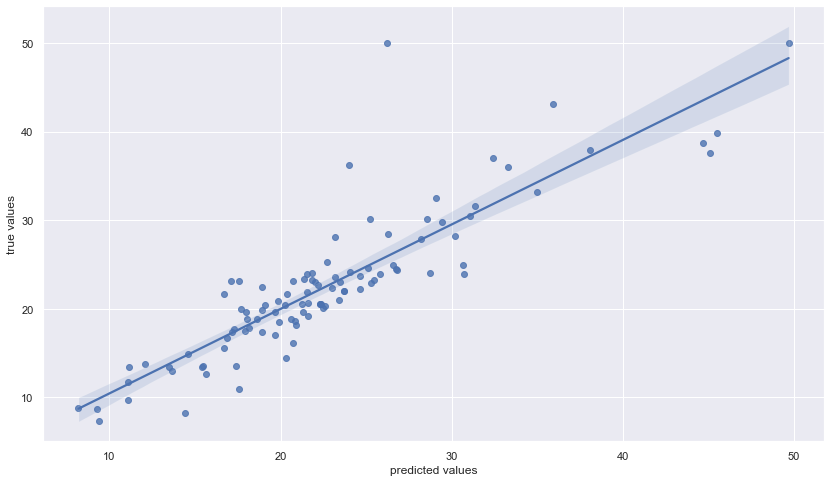

In [263]:
truepredplot(y_test, predict_poly)

In [264]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 3.16698444107654
MSE: 10.029790450020883
R2: 0.8874091045443856
MAPE: 2.327056783123779


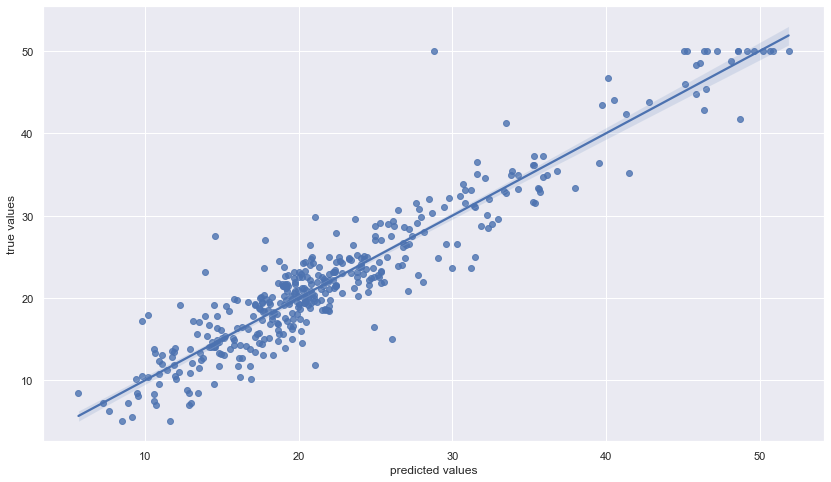

In [265]:
truepredplot(y_train, predict_poly)

Поліноміальна регресія показала себе найкраще, значення degree = 3 виявилося навдалішим, більше значення буде давати перенавчання, а degree = 2 дає не сильне недонавчання <br>
Похибки сильно зменшили своє значення, а значення R^2 досить велике як для навчальної вибірки, так і для тестової 